Results for MLP:


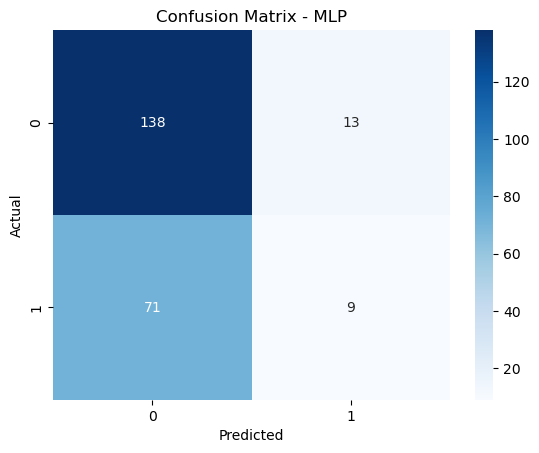

              precision    recall  f1-score   support

           0       0.66      0.91      0.77       151
           1       0.41      0.11      0.18        80

    accuracy                           0.64       231
   macro avg       0.53      0.51      0.47       231
weighted avg       0.57      0.64      0.56       231

Sensitivity: 0.1125
Specificity: 0.9139072847682119
Accuracy: 0.6363636363636364
F1-Score: 0.17647058823529413


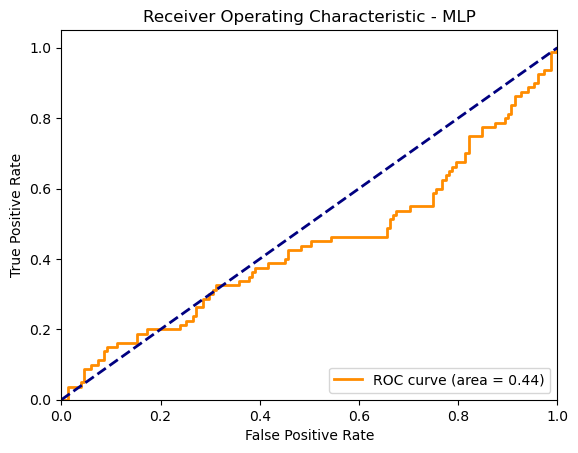

ROC AUC: 0.4406456953642384
Results for SVM:


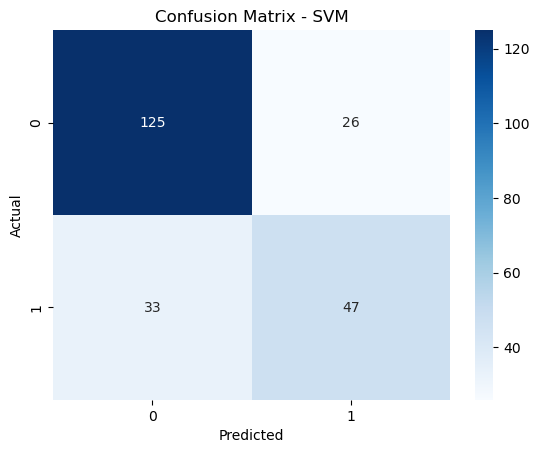

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       151
           1       0.64      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

Sensitivity: 0.5875
Specificity: 0.8278145695364238
Accuracy: 0.7445887445887446
F1-Score: 0.6143790849673203


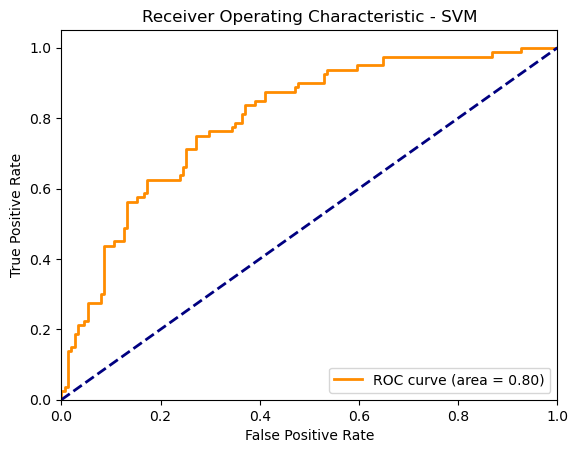

ROC AUC: 0.7973509933774834


In [9]:
# Gerekli kütüphanelerin yüklenmesi
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Veri setinin yüklenmesi
data = pd.read_csv('veri-seti.txt', sep='\t')

# Sütun isimlerinin verilmesi
data.columns = ['Np', 'Pg', 'Dbp', 'Tst', '2Si', 'Bmi', 'Dpf', 'Age', 'Outcome']

# Özellikler ve hedef değişkenin ayrılması
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Eğitim ve test verisinin ayrılması (%70 eğitim, %30 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verilerin standartlaştırılması
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Multi-Layer Perceptron (MLP) sınıflandırıcısının oluşturulması ve eğitilmesi
mlp = MLPClassifier(random_state=42, max_iter=3000, learning_rate_init=0.0001, early_stopping=True, n_iter_no_change=10)
mlp.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapılması (MLP)
y_pred_mlp = mlp.predict(X_test)

# Support Vector Machines (SVM) sınıflandırıcısının oluşturulması ve eğitilmesi
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapılması (SVM)
y_pred_svm = svm.predict(X_test)

# Sonuçların raporlanması
def report_results(y_test, y_pred, y_prob, model_name):
    print(f"Results for {model_name}:")
    
    # Konfüzyon matrisi
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    
    # Sınıflandırma raporu
    print(classification_report(y_test, y_pred))
    
    # Sensitivity, Specificity, Accuracy ve F1-Score hesaplanması
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    f1 = 2 * tp / (2 * tp + fp + fn)
    
    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")
    print(f"Accuracy: {accuracy}")
    print(f"F1-Score: {f1}")
    
    # ROC eğrisi ve AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.show()
    
    print(f"ROC AUC: {roc_auc}")

# MLP sonuçlarının raporlanması
report_results(y_test, y_pred_mlp, mlp.predict_proba(X_test)[:, 1], "MLP")

# SVM sonuçlarının raporlanması
report_results(y_test, y_pred_svm, svm.predict_proba(X_test)[:, 1], "SVM")
